In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv('./dataset/merged_clean_data.csv')

## Geographical Influence on Academic Performance:

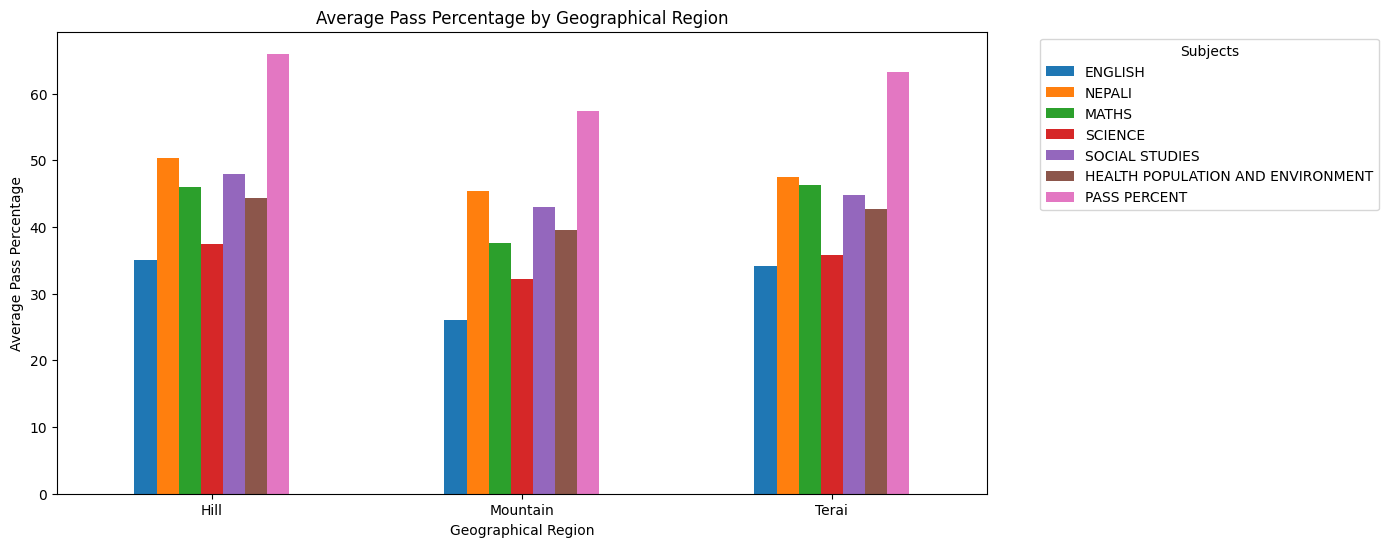

In [12]:
# Select only the relevant numeric columns for analysis
subjects = ['ENGLISH', 'NEPALI', 'MATHS', 'SCIENCE', 'SOCIAL STUDIES', 'HEALTH POPULATION AND ENVIRONMENT', 'PASS PERCENT']
numeric_data = data[subjects + ['Geographical Region']]

# Ensure all subject columns are numeric
numeric_data[subjects] = numeric_data[subjects].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with the mean
numeric_data[subjects] = numeric_data[subjects].fillna(numeric_data[subjects].mean())

# Group by Geographical Region and calculate mean pass percentage for each subject
geo_group = numeric_data.groupby('Geographical Region').mean()

# Plotting
ax = geo_group[subjects].plot(kind='bar', figsize=(12, 6))
plt.title('Average Pass Percentage by Geographical Region')
plt.ylabel('Average Pass Percentage')
plt.xlabel('Geographical Region')
plt.xticks(rotation=0)
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## School Performance by Development Region:

In [13]:
# Convert columns to numeric type
data['PASS PERCENT'] = pd.to_numeric(data['PASS PERCENT'], errors='coerce')
data['DISTINCTION'] = pd.to_numeric(data['DISTINCTION'], errors='coerce')

# Drop rows with missing values
data.dropna(subset=['PASS PERCENT', 'DISTINCTION'], inplace=True)

# Group by Development Region and calculate mean pass percentage and distinctions
dev_group = data.groupby('Development Region').mean()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
dev_group['PASS PERCENT'].plot(kind='bar', ax=ax[0], title='Average Pass Percentage by Development Region')
dev_group['DISTINCTION'].plot(kind='bar', ax=ax[1], title='Average Distinctions by Development Region')
ax[0].set_ylabel('Average Pass Percentage')
ax[1].set_ylabel('Average Distinctions')
plt.show()


TypeError: agg function failed [how->mean,dtype->object]